In [1]:
from gurobipy import *
from math import * 

In [2]:
"""

Chen, Y., Ren, S., Chen, Z., Chen, M., & Wu, H. (2020). 
Path planning for vehicle-borne system consisting of multi air–ground robots. 
Robotica, 38(3), 493-511.

https://scihub.wikicn.top/https://www.cambridge.org/core/journals/robotica/article/path-planning-for-vehicleborne-system-consisting-of-multi-airground-robots/26916C91743D946D9A53DF40D1D54787

https://drive.google.com/file/d/1PNCsK-GjcA4XNpoG85c6ynv7K_BhrVVW/view?usp=sharing
"""


n=8
M=100000

 
q=((0,0),(0,40),(0,50),(20,45),(46,50),(50,48),(50,35),(30,5),(30,3),(30,5),(30,0));

"""
q=((0,0),(0,40),(1,40),(3,40),(1,49),(46,50),(48,48),(46,46),(50,48),(50,35),(30,5),(30,0)
   ,(50,50),(34,50),(34,9),(0,13),(25,25),(50,34),(34,22),(53,9),(30,13),(15,25)
  ,(22,50),(4,50),(5,9),(6,13),(4,25),(8,34),(8,22),(32,9),(8,13),(30,25));

""" 
qs=(0,0)
qf=(50,0)
Vc=18
Vh=54
th=1/3
tr=1/6

In [3]:
qf[0]

50

In [4]:
# Create a new model
m = Model("MISOCP_2019")


# Create variables


tx = {};
ty = {};
lx = {};
ly = {};

alpha0 = {};

g = {};
f = {};
s = {};
d = {};




#for SOCP
Cx= {};
Cy= {};
C= {};




Ts= m.addVar(lb=0,vtype = 'C',name='Ts');
Tf= m.addVar(lb=0,vtype = 'C',name='Tf');

for i in range(1, n+1):
    
    tx[i] = m.addVar(vtype = 'C',name='tx[%s]'%i);
    ty[i] = m.addVar(vtype = 'C',name='ty[%s]'%i);
    lx[i] = m.addVar(vtype = 'C',name='lx[%s]'%i);
    ly[i] = m.addVar(vtype = 'C',name='ly[%s]'%i);
    
    
    f[i] = m.addVar(lb=0,ub=th,vtype = 'C',name='f[%s]'%i);
    s[i] = m.addVar(lb=0,vtype = 'C',name='s[%s]'%i);
    
    
for i in range(1, n):
   # alpha0[i] = m.addVar(vtype = 'C',name='alpha0[%s]'%i);
    d[i] = m.addVar(lb=0,vtype = 'C',name='d[%s]'%i);
    g[i] = m.addVar(lb=0,vtype = 'B',name='g[%s]'%i);

        
# Integrate new variables

m.update()

Academic license - for non-commercial use only


In [5]:
# Add constraint: 
ctr=0;



#C3
        
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C3');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C3');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C3');
            
m.addConstr( Cx[ctr]  == lx[n]-qf[0], 'C3cx.1'); 
m.addConstr( Cy[ctr]  == ly[n]-qf[1], 'C3cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C3c.2');
m.addConstr( C[ctr]-(Vc*Tf)  == 0, 'C3c.3');
        

    
#C4
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C4');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C4');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C4');
            
m.addConstr( Cx[ctr]  == tx[1]-qs[0], 'C4cx.1'); 
m.addConstr( Cy[ctr]  == ty[1]-qs[1], 'C4cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C4c.2');
m.addConstr( C[ctr]-(Vc*Ts)  == 0, 'C4c.3');






#C19
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C19');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C19');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C19');
            
m.addConstr( Cx[ctr]  == tx[1]-tx[2], 'C19cx.1'); 
m.addConstr( Cy[ctr]  == ty[1]-ty[2], 'C19cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C19c.2');
m.addConstr( C[ctr]-(Vc*s[1])-M*g[1]  == 0, 'C19c.3');


#C20
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C20');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C20');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C20');
            
m.addConstr( Cx[ctr]  == tx[1]-lx[1], 'C20cx.1'); 
m.addConstr( Cy[ctr]  == ty[1]-ly[1], 'C20cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C20c.2');
m.addConstr( C[ctr] -Vc*s[1] -M*(1-g[1])  == 0, 'C20c.3');


#C21
m.addConstr( -M*g[1]  <= f[1]-(s[1]+d[1]), 'C21cx.1'); 
m.addConstr( f[1]-(s[1]+d[1]) <= M*g[1], 'C21cx.2'); 

#C22
m.addConstr( -M*(1-g[1])  <= f[1]-s[1], 'C22cx.1'); 
m.addConstr( f[1]-s[1]  <= M*(1-g[1]), 'C22cx.2'); 



#C23
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C23');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C23');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C23');
            
m.addConstr( Cx[ctr]  == tx[n]-lx[n-1], 'C23cx.1'); 
m.addConstr( Cy[ctr]  == ty[n]-ly[n-1], 'C23cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C23c.2');
m.addConstr( C[ctr] -Vc*s[n] -M*g[n-1]  == 0, 'C23c.3');


#C24
ctr=ctr+1;
        
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C24');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C24');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C24');
            
m.addConstr( Cx[ctr]  == tx[n]-lx[n], 'C24cx.1'); 
m.addConstr( Cy[ctr]  == ty[n]-ly[n], 'C24cy.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C24c.2');
m.addConstr( C[ctr] -Vc*s[n] -M*(1-g[n-1])  == 0, 'C24c.3');


#C25
m.addConstr( -M*g[n-1]  <= f[n]-(s[n]+d[n-1]), 'C25.1'); 
m.addConstr( f[n]-(s[n]+d[n-1])  <= M*g[n-1], 'C25.2'); 


#C26
m.addConstr( -M*(1-g[n-1]) <= f[n]-s[n], 'C26.1'); 
m.addConstr( f[n]-s[n]  <= M*(1-g[n-1]), 'C26.2'); 


for i in range(1, n):
    """
    #C1
    m.addConstr( -M*g[i] <= alpha0[i]+d[i]  ,'C.1.1.[%s]'%i);
    m.addConstr( alpha0[i]+d[i] <= M*g[i]  ,'C.1.2.[%s]'%i);
    #C2
    m.addConstr( -M*(1-g[i]) <= alpha0[i]-d[i]  ,'C.2.1.[%s]'%i);
    m.addConstr( alpha0[i]-d[i] <= M*(1-g[i]) ,'C.2.2.[%s]'%i);
    """
    
    
    #C6
    ctr=ctr+1;
        
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C6.[%s]'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C6.[%s]'%i);
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C6.[%s]'%i);
            
    m.addConstr( Cx[ctr]  == tx[i+1]-lx[i], 'C6cx.1.[%s]'%i); 
    m.addConstr( Cy[ctr]  == ty[i+1]-ly[i], 'C6cy.1.[%s]'%i);
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C6c.2.[%s]'%i);
    m.addConstr( C[ctr]-(Vc*d[i])  == 0, 'C6c.3.[%s]'%i);
    
    if i>1:
        #C7
        ctr=ctr+1;
        
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C7.[%s]'%i);
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C7.[%s]'%i);
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C7.[%s]'%i);
            
        m.addConstr( Cx[ctr]  == tx[i+1]-lx[i-1], 'C7cx.1.[%s]'%i); 
        m.addConstr( Cy[ctr]  == ty[i+1]-ly[i-1], 'C7cy.1.[%s]'%i);
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C7c.2.[%s]'%i);
        m.addConstr( C[ctr]-(Vc*s[i])-M*g[i-1] - M*g[i] == 0, 'C7c.3.[%s]'%i);
        
        #C8
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C8.[%s]'%i);
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C8.[%s]'%i);
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C8.[%s]'%i);
            
        m.addConstr( Cx[ctr]  == lx[i]-lx[i-1], 'C8cx.1.[%s]'%i); 
        m.addConstr( Cy[ctr]  == ly[i]-ly[i-1], 'C8cy.1.[%s]'%i);
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C8c.2.[%s]'%i);
        m.addConstr( C[ctr]-(Vc*s[i])-M*g[i-1] - M*(1-g[i]) == 0, 'C8c.3.[%s]'%i);        
    
        #C9
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C9.[%s]'%i);
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C9.[%s]'%i);
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C9.[%s]'%i);
            
        m.addConstr( Cx[ctr]  == tx[i]-tx[i+1], 'C9cx.1.[%s]'%i); 
        m.addConstr( Cy[ctr]  == ty[i]-ty[i+1], 'C9cy.1.[%s]'%i);
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C9c.2.[%s]'%i);
        m.addConstr( C[ctr]-(Vc*s[i])-M*(1-g[i-1]) - M*g[i] == 0, 'C9c.3.[%s]'%i);   
        
        #C10
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C10.[%s]'%i);
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C10.[%s]'%i);
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C10.[%s]'%i);
            
        m.addConstr( Cx[ctr]  == tx[i]-lx[i], 'C10cx.1.[%s]'%i); 
        m.addConstr( Cy[ctr]  == ty[i]-ly[i], 'C10cy.1.[%s]'%i);
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C10c.2.[%s]'%i);
        m.addConstr( C[ctr]-(Vc*s[i])-M*(1-g[i-1]) - M*(1-g[i]) == 0, 'C10c.3.[%s]'%i);
        
        
        
        
        
        #C11
        m.addConstr( -(M*g[i-1]+M*g[i])  <= f[i]-(s[i]+d[i-1]+d[i]), 'C11.1.[%s]'%i); 
        m.addConstr( f[i]-(s[i]+d[i-1]+d[i])  <= M*g[i-1]+M*g[i], 'C11.2.[%s]'%i); 
        
        #C12
        m.addConstr( -(M*g[i-1]+M*(1-g[i]))  <= f[i]-(s[i]+d[i-1]), 'C12.1.[%s]'%i); 
        m.addConstr( f[i]-(s[i]+d[i-1])  <= M*g[i-1]+M*(1-g[i]), 'C12.2.[%s]'%i); 
        
        #C13
        m.addConstr( -(M*(1-g[i-1])+M*g[i])  <= f[i]-(s[i]+d[i]), 'C13.1.[%s]'%i); 
        m.addConstr( f[i]-(s[i]+d[i-1])  <= M*(1-g[i-1])+M*g[i], 'C13.2.[%s]'%i); 

        
        #C14
        m.addConstr( -(M*(1-g[i-1])+M*(1-g[i]))  <= f[i]-s[i], 'C14.1.[%s]'%i); 
        m.addConstr( f[i]-s[i] <= M*(1-g[i-1])+M*(1-g[i]), 'C14.2.[%s]'%i); 
        
        
        
        
        #C15
        m.addConstr( s[i]+M*g[i-1]+M*g[i]  >= tr, 'C15.[%s]'%i); 
        #C16
        m.addConstr( s[i]+d[i]+M*g[i-1]+M*(1-g[i])  >= tr, 'C16.[%s]'%i); 
        #C17
        m.addConstr( s[i]+d[i-1]+M*(1-g[i-1]) + M*g[i]  >= tr, 'C17.[%s]'%i); 
        #C18
        m.addConstr( s[i]+d[i-1]+d[i]+M*(1-g[i-1]) + M*(1-g[i])  >= tr, 'C18.[%s]'%i); 
        
        
for i in range(1, n+1):
    
    #m.addConstr( f[i]  <= th, 'f[%s]'%i); 
  
    #C5
    ctr=ctr+1; 
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C5.1.[%s]'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C5.1.[%s]'%i);
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C5.1.[%s]'%i);

    ctr=ctr+1; 
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C5.2.[%s]'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C5.2.[%s]'%i);
    C[ctr] = m.addVar(lb=0.0,ub=GRB.INFINITY,vtype = 'C',name='C.C5.2.[%s]'%i);
    
    m.addConstr( Cx[ctr-1]  == tx[i]-q[i][0], 'C5cx.1.1.[%s]'%i); 
    m.addConstr( Cy[ctr-1]  == ty[i]-q[i][1], 'C5cy.1.1.[%s]'%i);
    m.addQConstr( Cx[ctr-1]*Cx[ctr-1] + Cy[ctr-1]*Cy[ctr-1] <=  C[ctr-1]*C[ctr-1], 'C5c.2.1.[%s]'%i);
    
    m.addConstr( Cx[ctr]  == lx[i]-q[i][0], 'C5cx.1.2.[%s]'%i); 
    m.addConstr( Cy[ctr]  == ly[i]-q[i][1], 'C5cy.1.2.[%s]'%i);
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C5c.2.2.[%s]'%i);
    
    m.addConstr( C[ctr]+C[ctr-1]-Vh*f[i]  == 0, 'C5c.3.[%s]'%i);
    

"""
#test
m.addConstr( tx[1]  == 1.9470);
m.addConstr( tx[2]  == 6.5555);
m.addConstr( tx[3]  == 18.9357);
m.addConstr( tx[4]  == 34.8446);
m.addConstr( tx[5]  == 40.3953);
m.addConstr( tx[6]  == 42.1624);
#m.addConstr( tx[7]  == 41.4193);
#m.addConstr( tx[8]  == 34.5042);

m.addConstr( ty[1]  == 40.1419);
m.addConstr( ty[2]  == 46.1412);
m.addConstr( ty[3]  == 46.3237);
m.addConstr( ty[4]  == 46.5194);
m.addConstr( ty[5]  == 46.0908);
m.addConstr( ty[6]  == 29.5769);
#m.addConstr( ty[7]  == 27.8529);
#m.addConstr( ty[8]  == 3.9712);

 
    
m.addConstr( g[1]  == 1);
m.addConstr( g[2]  == 1);
m.addConstr( g[3]  == 1);
m.addConstr( g[4]  == 0);
m.addConstr( g[5]  == 1);
#m.addConstr( g[6]  == 0);
#m.addConstr( g[7]  == 1);


m.addConstr( d[1]  == 1.7738827736085825e-15);
m.addConstr( d[2]  == 0.7013033195796641);
m.addConstr( d[3]  == 0.6794849200833817);
m.addConstr( d[4]  == 0.001601605840596718);
m.addConstr( d[5]  == 0.1925480557997278);
m.addConstr( d[6]  == 1.3854689816305938);
m.addConstr( d[7]  == 1.7641608241680938e-15);

""" 


'\n#test\nm.addConstr( tx[1]  == 1.9470);\nm.addConstr( tx[2]  == 6.5555);\nm.addConstr( tx[3]  == 18.9357);\nm.addConstr( tx[4]  == 34.8446);\nm.addConstr( tx[5]  == 40.3953);\nm.addConstr( tx[6]  == 42.1624);\n#m.addConstr( tx[7]  == 41.4193);\n#m.addConstr( tx[8]  == 34.5042);\n\nm.addConstr( ty[1]  == 40.1419);\nm.addConstr( ty[2]  == 46.1412);\nm.addConstr( ty[3]  == 46.3237);\nm.addConstr( ty[4]  == 46.5194);\nm.addConstr( ty[5]  == 46.0908);\nm.addConstr( ty[6]  == 29.5769);\n#m.addConstr( ty[7]  == 27.8529);\n#m.addConstr( ty[8]  == 3.9712);\n\n \n    \nm.addConstr( g[1]  == 1);\nm.addConstr( g[2]  == 1);\nm.addConstr( g[3]  == 1);\nm.addConstr( g[4]  == 0);\nm.addConstr( g[5]  == 1);\n#m.addConstr( g[6]  == 0);\n#m.addConstr( g[7]  == 1);\n\n\nm.addConstr( d[1]  == 1.7738827736085825e-15);\nm.addConstr( d[2]  == 0.7013033195796641);\nm.addConstr( d[3]  == 0.6794849200833817);\nm.addConstr( d[4]  == 0.001601605840596718);\nm.addConstr( d[5]  == 0.1925480557997278);\nm.addConstr

In [6]:
###Objective Function

tm = Ts+Tf+ quicksum(f[i] for i in range(1,n+1)) + quicksum((2*g[i]-1)*d[i] for i in range(1,n)) 
#Ts+Tf+ quicksum(f[i] for i in range(1,n+1)) + quicksum((2*g[i]-1)*d[i] for i in range(1,n)) 
#Ts+Tf+ quicksum(f[i] for i in range(1,n+1)) + quicksum(alpha0[i] for i in range(1,n))
m.setObjective(tm,GRB.MINIMIZE)

In [7]:
m.optimize()

Optimize a model with 231 rows, 223 columns and 796 nonzeros
Model has 7 quadratic objective terms
Model has 53 quadratic constraints
Variable types: 216 continuous, 7 integer (7 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  QObjective range [4e+00, 4e+00]
  Bounds range     [3e-01, 1e+00]
  RHS range        [2e-01, 2e+05]
Presolve removed 44 rows and 44 columns
Presolve time: 0.02s
Presolved: 194 rows, 186 columns, 727 nonzeros
Variable types: 179 continuous, 7 integer (7 binary)

Root relaxation: objective -3.500006e+05, 24 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -350000.58    0    7          - -350000.58      -     -    0s
     0     0 -266665.74    0    7          - -266665.74      -     -    0s
     0     0 -266665.67    0    7          - -26666

In [8]:
obj = m.getObjective()
print("t_m:",obj.getValue(),"hours\n")
print ('runtime is',m.Runtime,"secs\n")
print("M:",M,"\n")
print("n:",n,"\n-----")
for i in range(1,n):
    print("g",i,":",abs(g[i].X))

for i in range(1,n+1):
    print("\nt", i," : (",tx[i].X,", ", ty[i].X,")")
    print("l", i," : (",lx[i].X,", ", ly[i].X,")\n-----")
    
        


t_m: 7.5522010690871975 hours

runtime is 0.7035660743713379 secs

M: 100000 

n: 8 
-----
g 1 : 1.0
g 2 : 1.0
g 3 : 1.0
g 4 : 1.0
g 5 : 0.0
g 6 : 1.0
g 7 : 0.0

t 1  : ( 3.0121253297926383 ,  35.66374454163622 )
l 1  : ( 3.309208259658977 ,  39.18085205605943 )
-----

t 2  : ( 3.5234839866838237 ,  41.71821401130619 )
l 2  : ( 7.945629628000999 ,  45.773411606771525 )
-----

t 3  : ( 16.735567829802008 ,  45.753340818417435 )
l 3  : ( 19.808753103090282 ,  45.74682499114571 )
-----

t 4  : ( 35.29866793184733 ,  45.710057054978485 )
l 4  : ( 41.279615359351325 ,  45.69599370051821 )
-----

t 5  : ( 41.300078778934775 ,  45.69594661333745 )
l 5  : ( 44.68140266520942 ,  40.739474556527874 )
-----

t 6  : ( 44.68017164112507 ,  40.741337154195946 )
l 6  : ( 42.67055769861523 ,  35.57038169820235 )
-----

t 7  : ( 33.21559066143344 ,  11.265359467028691 )
l 7  : ( 32.25015649069365 ,  9.752891596205222 )
-----

t 8  : ( 32.86156707323325 ,  10.355379952774154 )
l 8  : ( 39.99573700730391

# Draw the graph

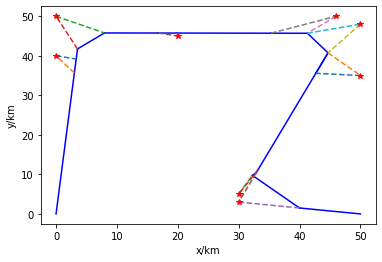

In [43]:
import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([tx[1].X, qs[0]],[ty[1].X,  qs[1]], color= 'b')
plt.plot([lx[n].X, qf[0]],[ly[n].X,  qf[1]], color= 'b')

for i in range(1,n):
    if g[i].X>0.9:
        plt.plot([tx[i].X, lx[i].X],[ty[i].X,  ly[i].X], color= 'b')
        plt.plot([tx[i+1].X, lx[i].X],[ty[i+1].X,  ly[i].X], color= 'b')
        
    else:
        plt.plot([tx[i].X, tx[i+1].X],[ty[i].X,  ty[i+1].X], color= 'b')
        plt.plot([lx[i].X, tx[i+1].X],[ly[i].X,  ty[i+1].X], color= 'b')
        plt.plot([lx[i].X, lx[i+1].X],[ly[i].X,  ly[i+1].X], color= 'b')
        
if g[n-1].X>0.9:
    plt.plot([tx[n].X, lx[n].X],[ty[n].X,  ly[n].X], color= 'b')

for i in range(1,n+1):
    plt.plot([q[i][0] ,  lx[i].X] ,[q[i][1],  ly[i].X],linestyle= '--')
    plt.plot([tx[i].X, q[i][0]],[ty[i].X,  q[i][1]],linestyle= '--')
    plt.plot(q[i][0], q[i][1], marker='*',color='r')

# Debug

## 測obj有沒有算錯：ＯＫ

In [10]:
import numpy as np
def distance(tx,ty ,lx,ly):
    x_dist = (tx - lx)**2
    y_dist = (ty - ly)**2
    dist = np.sqrt(x_dist + y_dist )
    return dist



In [11]:
Tf=distance(qf[0],qf[1] ,lx[n].X,  ly[n].X)

In [12]:
Ts=distance(qs[0],qs[1] ,tx[1].X,  ty[1].X)

In [13]:
#quicksum(f[i] for i in range(1,n+1)) + quicksum((2*g[i]-1)*d[i] for i in range(1,n)) 

In [14]:
ff=sum(f[i].X for i in range(1,n+1)) 

In [15]:
ff

2.2912977846874054

In [16]:
dd=sum((2*g[i].X-1)*d[i].X for i in range(1,n)) 

In [17]:
dd

2.710521036578921

In [18]:
d

{1: <gurobi.Var d[1] (value 0.14146630546639502)>,
 2: <gurobi.Var d[2] (value 0.48833117360636513)>,
 3: <gurobi.Var d[3] (value 0.8605532549709884)>,
 4: <gurobi.Var d[4] (value 0.0011368607869243273)>,
 5: <gurobi.Var d[5] (value 0.00012404759483702405)>,
 6: <gurobi.Var d[6] (value 1.448850659330859)>,
 7: <gurobi.Var d[7] (value 0.2296931699877743)>}

In [19]:
nw=(Tf+Ts)/18+ff+dd

In [20]:
nw

7.5522010671808175

# Test the example on paper : false

# 從example 反推

In [21]:
3.01212489e+00,  3.56561532e+01,  3.30920827e+00,  3.91819450e+01,
        3.52326676e+00,  4.17186771e+01,  7.94560496e+00,  4.57734117e+01,
        1.67355674e+01,  4.57543071e+01,  1.98029311e+01,  4.57272879e+01,
        3.52758014e+01,  4.57143819e+01,  4.12665974e+01,  4.56959905e+01,
        4.12971457e+01,  4.56960978e+01,  4.46813822e+01,  4.07423230e+01,
        4.46802262e+01,  4.07413571e+01,  4.26698000e+01,  3.55704019e+01,
        3.32155928e+01,  1.12653592e+01,  3.22502546e+01,  7.42156627e+00,
        3.28617300e+01,  1.03553838e+01,  3.99926468e+01,  1.47678816e+00

(29.9954226, 5.00147342, 50.0022373, 0.000110231422)

In [76]:
t1= [3.01212489e+00,  3.56561532e+01] 
t2= [3.52326676e+00,  4.17186771e+01]
t3 =[1.67355674e+01,  4.57543071e+01] 
t4 =[3.52758014e+01,  4.57143819e+01] 
t5= [4.12971457e+01,  4.56960978e+01] 
t6= [4.46802262e+01,  4.07413571e+01]
t7= [3.32155928e+01,  1.12653592e+01] 
t8= [ 3.28617300e+01,  1.03553838e+01] 

In [77]:
l1=[ 3.30920827e+00,  3.91819450e+01]
l2= [ 7.94560496e+00,  4.57734117e+01]
l3= [ 1.98029311e+01,  4.57272879e+01]
l4= [4.12665974e+01,  4.56959905e+01]
l5=[4.46813822e+01,  4.07423230e+01]
l6=[4.26698000e+01,  3.55704019e+01]
l7=[3.22502546e+01,  7.42156627e+00]
l8= [3.99926468e+01,  1.47678816e+00]

In [82]:
Ts=distance(qs[0],qs[1] ,t1[0],  t1[1])/18

In [83]:
Tf=distance(qf[0],qf[1] ,l8[0],  l8[1])/18

In [80]:
f_ex= (distance(q[1][0],q[1][1] ,t1[0],  t1[1])+distance(q[1][0],q[1][1] ,l1[0],  l1[1])+
     distance(q[2][0],q[2][1] ,t2[0],  t2[1])+distance(q[2][0],q[2][1] ,l2[0],  l2[1]) +
    distance(q[3][0],q[3][1] ,t3[0],  t3[1])+distance(q[3][0],q[3][1] ,l3[0],  l3[1]) +
    distance(q[4][0],q[4][1] ,t4[0],  t4[1])+distance(q[4][0],q[4][1] ,l4[0],  l4[1])+
    distance(q[5][0],q[5][1] ,t5[0],  t5[1])+distance(q[5][0],q[5][1] ,l5[0],  l5[1])+
    distance(q[6][0],q[6][1] ,t6[0],  t6[1])+distance(q[6][0],q[6][1] ,l6[0],  l6[1])+
    distance(q[7][0],q[7][1] ,t7[0],  t7[1])+distance(q[7][0],q[7][1] ,l7[0],  l7[1])+
    distance(q[8][0],q[8][1] ,t8[0],  t8[1])+distance(q[8][0],q[8][1] ,l8[0],  l8[1]))/54

In [81]:
d_ex= (
     distance(l1[0],l1[1] ,t2[0],  t2[1])+
    distance(t3[0],  t3[1] ,l2[0],  l2[1]) +
    distance(t4[0],  t4[1] ,l3[0],  l3[1]) -
    distance(t5[0],  t5[1] ,l4[0],  l4[1])+
    distance(t6[0],  t6[1] ,l5[0],  l5[1])-
    distance(t7[0],  t7[1] ,l6[0],  l6[1])+
    distance(t8[0],  t8[1] ,l7[0],  l7[1])
)/18

In [84]:
d_ex

0.20540954811766535

In [85]:
Ts+Tf+f_ex+d_ex

4.797444789128168

# 例子最佳解＝7.352429336133469

# paper上的例子檢驗：f (should<0.3333)

In [86]:
(distance(q[1][0],q[1][1] ,t1[0],  t1[1])+distance(q[1][0],q[1][1] ,l1[0],  l1[1]))/54

0.16101542290890342

In [87]:
(distance(q[2][0],q[2][1] ,t2[0],  t2[1])+distance(q[2][0],q[2][1] ,l2[0],  l2[1]))/54

0.3333234612330849

In [88]:
(distance(q[3][0],q[3][1] ,t3[0],  t3[1])+distance(q[3][0],q[3][1] ,l3[0],  l3[1]))/54

0.07599929571823026

In [89]:
(distance(q[4][0],q[4][1] ,t4[0],  t4[1])+distance(q[4][0],q[4][1] ,l4[0],  l4[1]))/54

0.33234133421906203

In [90]:
(distance(q[5][0],q[5][1] ,t5[0],  t5[1])+distance(q[5][0],q[5][1] ,l5[0],  l5[1]))/54

0.33334279577322845

In [91]:
(distance(q[6][0],q[6][1] ,t6[0],  t6[1])+distance(q[6][0],q[6][1] ,l6[0],  l6[1]))/54

0.2811007237524667

In [92]:
(distance(q[7][0],q[7][1] ,t7[0],  t7[1])+distance(q[7][0],q[7][1] ,l7[0],  l7[1]))/54

0.19163058095828966

In [93]:
distance(q[8][0],q[8][1] ,t8[0],  t8[1])+distance(q[8][0],q[8][1] ,l8[0],  l8[1])

18.000549712071237

In [38]:
q[2]

(0, 50)

In [39]:
t2

[3.04138247, 34.3378388]

In [40]:
#m.computeIIS()

status = m.status
if status == GRB.Status.OPTIMAL:
    for v in m.getVars():
        print('%s %g' % (v.varName, v.x))
    print('Obj: %g' % m.objVal)
       
elif status == GRB.Status.INFEASIBLE:
    print('Optimization was stopped with status %d' % status)
    # do IIS
    m.computeIIS()
    for c in m.getConstrs():
        if c.IISConstr:
            print('%s' % c.constrName)

In [41]:
g

{1: <gurobi.Var g[1] (value 1.0)>,
 2: <gurobi.Var g[2] (value 1.0)>,
 3: <gurobi.Var g[3] (value 1.0)>,
 4: <gurobi.Var g[4] (value 1.0)>,
 5: <gurobi.Var g[5] (value -0.0)>,
 6: <gurobi.Var g[6] (value 1.0)>,
 7: <gurobi.Var g[7] (value -0.0)>}

In [42]:
distance((3.0121253297926383 ,  35.66374454163622), (3.309208259658977 ,  39.18085205605943))

TypeError: distance() missing 2 required positional arguments: 'lx' and 'ly'

In [ ]:
<Vc*s[1].X

In [ ]:
s[1].X

In [ ]:
0.035185882703834465*18

In [ ]:
3.0121253297926383 ,  35.66374454163622,  3.309208259658977 ,  39.18085205605943

In [46]:
g

{1: <gurobi.Var g[1] (value 1.0)>,
 2: <gurobi.Var g[2] (value 1.0)>,
 3: <gurobi.Var g[3] (value 1.0)>,
 4: <gurobi.Var g[4] (value 1.0)>,
 5: <gurobi.Var g[5] (value -0.0)>,
 6: <gurobi.Var g[6] (value 1.0)>,
 7: <gurobi.Var g[7] (value -0.0)>}

In [44]:
s

{1: <gurobi.Var s[1] (value 0.1960906793489281)>,
 2: <gurobi.Var s[2] (value 0.33333333272554433)>,
 3: <gurobi.Var s[3] (value 0.17073290516667713)>,
 4: <gurobi.Var s[4] (value 0.33227577827543586)>,
 5: <gurobi.Var s[5] (value 0.3332092813471227)>,
 6: <gurobi.Var s[6] (value 0.3081356654087086)>,
 7: <gurobi.Var s[7] (value 0.05424553952160387)>,
 8: <gurobi.Var s[8] (value 0.1036401628393821)>}

In [51]:
s_=[]
s_.append(f[1].X-(1-g[1].X)*d[1].X)
for i in range(2,n):
    s_.append(f[i].X -(1-g[i-1].X)*d[i-1].X -(1-g[i].X)*d[i].X)
    
s_.append(f[n].X-(1-g[n-1].X)*d[n-1].X)  
    

In [52]:
s_

[0.1960906793489281,
 0.33333333272554433,
 0.17073290516667713,
 0.33227577827543586,
 0.33320928522379767,
 0.30813566540862936,
 0.0542455405338009,
 0.10364016283936936]

In [69]:
f_left=[]
#C5
    
    
for i in range(1,n+1):
    f_left.append((1/Vh)*(distance(q[i][0], q[i][1],tx[i].X,ty[i].X)
                         + distance(q[i][0], q[i][1], lx[i].X, ly[i].X ) 
                        )
                )
        

In [71]:
f_left

[0.16090479664509363,
 0.3333333314253812,
 0.07631765269680645,
 0.3317996698766063,
 0.3333333318323165,
 0.2810871213254016,
 0.2277959917083334,
 0.33333333200123394]

In [73]:
for i in range(1,9):
    f_[i-1]=f[i].X-f_left[i-1]

In [62]:
f

{1: <gurobi.Var f[1] (value 0.1960906793489281)>,
 2: <gurobi.Var f[2] (value 0.33333333272554433)>,
 3: <gurobi.Var f[3] (value 0.17073290516667713)>,
 4: <gurobi.Var f[4] (value 0.33227577827543586)>,
 5: <gurobi.Var f[5] (value 0.3333333328186347)>,
 6: <gurobi.Var f[6] (value 0.3082597130034664)>,
 7: <gurobi.Var f[7] (value 0.2839387105215752)>,
 8: <gurobi.Var f[8] (value 0.33333333282714367)>}

In [56]:
distance(2,3,2,4)

1.0

In [75]:
f_

[0.035185882703834465,
 1.3001631438136485e-09,
 0.09441525246987069,
 0.0004761083988295556,
 9.863181937852517e-10,
 0.027172591678064795,
 0.056142718813241815,
 8.259097294960327e-10]

In [74]:
f_left

[0.16090479664509363,
 0.3333333314253812,
 0.07631765269680645,
 0.3317996698766063,
 0.3333333318323165,
 0.2810871213254016,
 0.2277959917083334,
 0.33333333200123394]

In [ ]:
#推出來的f比model 小